In [20]:
# Importing the necessary module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
%matplotlib inline


### **Creating the Dataset and inseting the outliers**

In [21]:
import numpy as np

# Setting random seed
np.random.seed(42)

# Generate a list of 20 random numbers between 1 and 25
numbers = []
for i in range(30):
    numbers.append(np.random.randint(1, 30))
print("numbers:", numbers)

# Generate random positions for each outlier
positions = []
for i in range(4):
    positions.append(np.random.randint(0, len(numbers)))

print("positions", positions)

# Insert the outliers at the random positions
for i in range(len(positions)):
    numbers.insert(positions[i], [103, 107, 109, 111][i])

# Print the list of numbers
dataset = numbers
print("dataset: ", dataset)

numbers: [7, 20, 29, 15, 11, 8, 29, 21, 7, 26, 19, 23, 11, 11, 24, 21, 4, 8, 24, 3, 22, 21, 2, 24, 12, 6, 2, 28, 21, 1]
positions [11, 25, 21, 28]
dataset:  [7, 20, 29, 15, 11, 8, 29, 21, 7, 26, 19, 103, 23, 11, 11, 24, 21, 4, 8, 24, 3, 109, 22, 21, 2, 24, 107, 12, 111, 6, 2, 28, 21, 1]


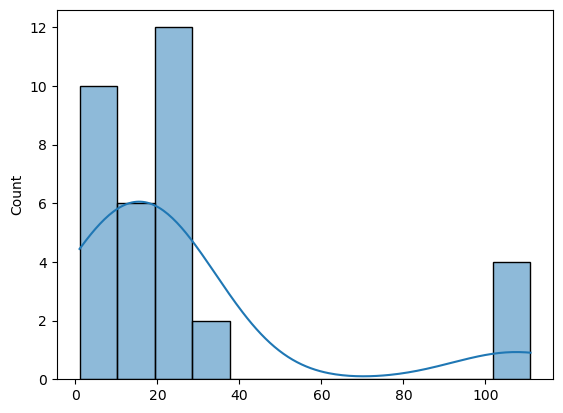

In [22]:
# histograms
import seaborn as sns

sns.histplot(x = dataset, kde=True)
plt.show()

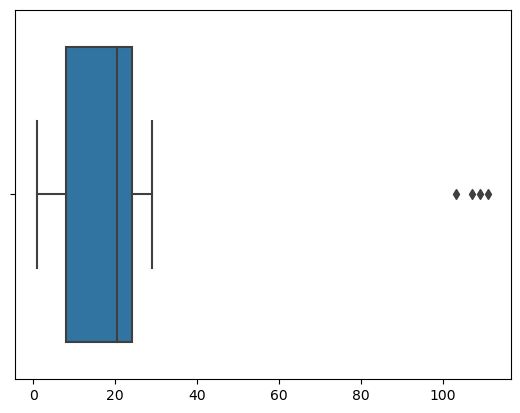

In [23]:
# boxplot
sns.boxplot(x=dataset)
plt.show()


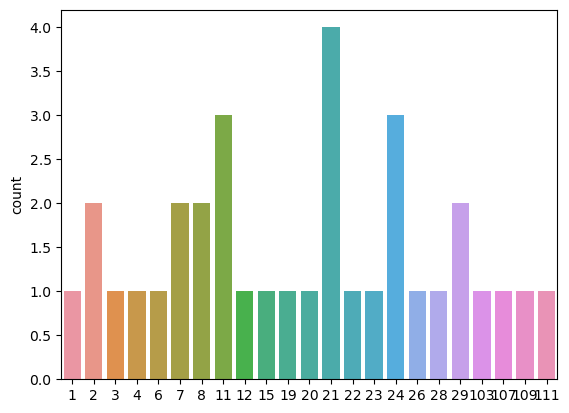

In [24]:
# Countint the values
sns.countplot(x = dataset)
plt.show()

# **Outliers**

## **01 - Z-Score**

The formula for calculating the z-score:

**For population**:

$$z = \frac{x - \mu}{\sigma}$$


Where:


- $x$ is the raw score you want to standardize
- $μ$ is the mean of the population
- $σ$ is the standard deviation of the population




**For sample**:

$$\large z = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

where:

- $x̄$ is the `sample mean`
- $μ$ is the `population mean`
- $s$ is the `population` standard deviation
- $n$ is the `sample size`  `len(data)`
  
The main difference between the population and sample formulas is that the sample formula uses the `sample mean` and `sample standard dev`

The z-score tells you how many standard deviations away from the mean your raw score is.

A positive z-score means your raw score is above the mean, and a negative z-score means it's below the mean.

A z-score of 0 means your raw score is exactly at the mean.


In [25]:

dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10,
           13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]

outliers = []

def detect_outlier(dataset):
    threshold = 3  # set the threshold for identifying outliers
    mean = np.mean(dataset)
    std = np.std(dataset)

    for i in dataset:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers


# call the detect_outlier function to identify outliers
detect_outlier(dataset)


[102, 107, 108]

## **02 - Inter Quartile Range**

1. Sort the data
2. Calculate $Q_1$ aqnd $Q_3$
3. $IQR = (Q_3-Q_1)$
4. Find the Lower fence $\rightarrow$ ($Q_1 - 1.5(IQR)$)
5. Find the upper fence $\rightarrow$ ($Q_3 + 1.5(IQR)$)

In [26]:
dataset = [11, 10, 12, 14, 12, 15, 14, 13, 15, 102, 12, 14, 17, 19, 107, 10,
           13, 12, 14, 12, 108, 12, 11, 14, 13, 15, 10, 15, 12, 10, 14, 13, 15, 10]

q1 = np.percentile(dataset, 25)
q3 = np.percentile(dataset, 75)
iqr = q3 - q1
lower_fence = q1 - 1.5*iqr
upper_fence = q3 + 1.5*iqr

outliers = []

for i in dataset:
    if (i < lower_fence) or (i > upper_fence):
        outliers.append(i)

print("Q1, Q3:", q1, q3)
print("lower_fence, upper_fence:", lower_fence, upper_fence)
print("Outliers:", outliers)


Q1, Q3: 12.0 15.0
lower_fence, upper_fence: 7.5 19.5
Outliers: [102, 107, 108]


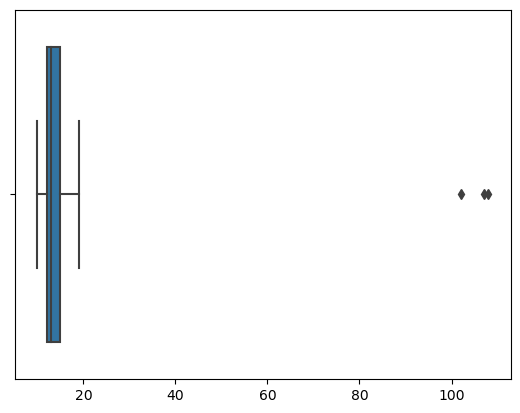

In [27]:
sns.boxplot(x=dataset)
plt.show()

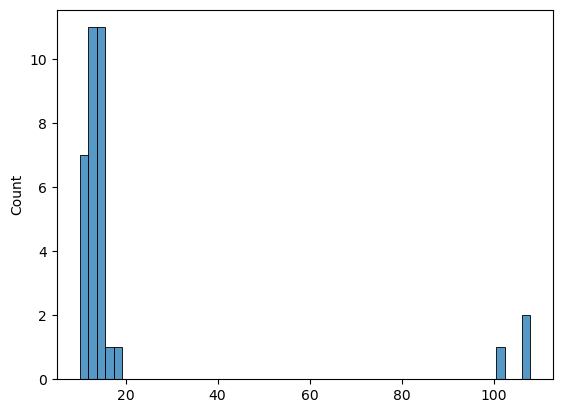

In [28]:
sns.histplot(x=dataset)
plt.show()


## **03 - Hypothesis testing**

- `Null hypothesis` ($H_0$): There’s no effect in the population. This can often be considered the `status quo` and as a result if you cannot accept the null it requires some action 1.
- `Alternative hypothesis` ($H_1$): There’s an effect in the population. This is usually what the researcher is trying to prove. 

- The p-value is a number calculated from a statistical test that describes how likely you are to have found a particular set of observations if the null hypothesis were true .
- P-values are used in hypothesis testing to help decide whether to reject the null hypothesis. The smaller the p-value, the more likely you are to reject the null hypothesis .
- To decide whether to reject or fail to reject the null hypothesis based on the p-value, you need to determine a significance level to use. Common choices for significance levels ($\alpha$) are `0.01`, `0.05`, and `0.1` .
- If the p-value is less than the significance level, then you reject the null hypothesis & accept alternate hypothesis. If the p-value is not less than the significance level, then you fail to reject the null hypothesis .

**Question:**

>Suppoe the *IQ* in a certain population is normally distributed with mean of $\mu=100$ and standard deviation of $\sigma =15$.A researcher wants to know if a new drug affects IQ levels, so he recruits $20$ patients to try it and record their IQ levels.The following code shows how to perform a one sample `z-test` in python to determine if the new drug causes a significant difference in IQ levels?

**For sample**:

$$\large z = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

where:

- $x̄$ is the `sample mean`
- $μ$ is the `population mean`
- $s$ is the `population` standard deviation
- $n$ is the `sample size`  `len(data)`
  
The main difference between the population and sample formulas is that the sample formula uses the `sample mean` and `sample standard dev`



In [29]:
from scipy.stats import norm
import numpy as np

# set the population parameters
pop_mean = 100
pop_std_dev = 15

# set the sample data for 20 patients with a larger mean
sample_data = [105, 110, 105, 105, 107, 105, 105, 108, 105, 105,
               105, 105, 110, 105, 105, 107, 105, 105, 108, 105]

# set the significance level and the null hypothesis
sign_level = 0.05  # significance level
null_hypothesis = "the new drug does not affect IQ levels"

# calculate the sample statistics
sample_mean = sum(sample_data) / len(sample_data)

# calculate the z-score and p-value
z_score = (sample_mean - pop_mean) / (pop_std_dev * np.sqrt(len(sample_data)))
p_value = 2 * norm.sf(abs(z_score))

print(z_score)
print(p_value)

# compare the p-value with the significance level
if p_value <= sign_level:
    print(f"Reject the null hypothesis that {null_hypothesis}")
    print("as there is evidence to suggest that the new drug causes a significant difference in IQ levels.")
else:
    print(f"Fail to reject the null hypothesis that {null_hypothesis}")
    print("as there is not enough evidence to suggest that the new drug causes a significant difference in IQ levels.")


0.08944271909999157
0.9287300745648026
Fail to reject the null hypothesis that the new drug does not affect IQ levels
as there is not enough evidence to suggest that the new drug causes a significant difference in IQ levels.


In [30]:
from scipy.stats import norm

# IQ level for the 20 Patients
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
        109, 109, 109, 110, 112, 112, 113, 114, 115]

sign_level = 0.05  # significance level

sample_mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # set ddof=1 for sample_standard_deviation

# set the significance level and the null hypothesis
sign_level = 0.05  # significance level
null_hypothesis = "the new drug does not affect IQ levels"

# Null hypothesis: population mean = 100
# Alternative hypothesis: population mean != 100

# Calculating the z-score for population mean = 100 under the null hypothesis
z_score = (sample_mean - 100) / (std_dev / np.sqrt(len(data)))
print("z-score: ", z_score)

# two-sided p-value
p_value = norm.sf(abs(z_score))*2
print("p-value: ", p_value)

# compare the p-value with the significance level
if p_value <= sign_level:
    print(f"Reject the null hypothesis that {null_hypothesis}") 
    print("as there is evidence to suggest that the new drug causes a significant difference in IQ levels.")
else:
    print(f"Fail to reject the null hypothesis that {null_hypothesis}")
    print("as there is not enough evidence to suggest that the new drug causes a significant difference in IQ levels.")

z-score:  1.466759520028843
p-value:  0.142441485116674
Fail to reject the null hypothesis that the new drug does not affect IQ levels
as there is not enough evidence to suggest that the new drug causes a significant difference in IQ levels.


In [31]:
from statsmodels.stats.weightstats import ztest as ztest

# IQ level for the 20 Patients
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
        109, 109, 109, 110, 112, 112, 113, 114, 115]

z_score, p_value =ztest(data, value=100) # output is tstat(z-score) & p-value
print(f"z_score = {z_score}, pvalue = {p_value}")


z_score = 1.466759520028843, pvalue = 0.142441485116674


<p align='center'>
  <a href="#"><img src='https://vitalflux.com/wp-content/uploads/2021/12/level-of-significance-and-p-value.png' width=50% ></a>
</p>


#### **The output of the code provides two values:**

- `z_score`: is the test statistic, which measures the number of standard deviations between the sample mean and the population mean under the null hypothesis. In this case, the null hypothesis is that the new drug does not affect IQ levels, which means that the population mean IQ level remains at 100. A positive z_score indicates that the sample mean is higher than the population mean, while a negative z_score indicates the opposite.

- `p_value` is the probability of obtaining a test statistic as extreme as the one observed, assuming the null hypothesis is true. In other words, it measures the likelihood of obtaining the observed sample mean if the new drug has no effect on IQ levels. A small p_value suggests that the observed sample mean is unlikely to have occurred by chance alone, given the null hypothesis.

**To determine whether to accept or reject the null hypothesis based on these values?**

we need to compare the `p_value` to a predetermined `significance level`, usually denoted as $α$. If the `p-value <= α`, then the result is considered statistically significant, and **we can reject the null hypothesis & accept alternative hypothesis that the new drug affects IQ levels**.

Typically, `α` is set to `0.05` or `0.01`, which means that you are willing to accept a `5%` or `1%` chance of making a `Type I error` that is rejecting the null hypothesis when it is actually true.

>In this case, the `p_value` is `0.142`, which is greater than `α=0.05`. Therefore, we fail to reject the null hypothesis and conclude that there is insufficient evidence to suggest that the new drug has a significant effect on IQ levels in the population.

#### **Significance level**

The `significance level`, also called alpha $\alpha$, is the `threshold` we set for deciding whether to reject the **null hypothesis** $H_0$. It is the maximum probability of making a `Type-I Error` (rejecting the null hypothesis $H_0$ when it is actually true) that we are willing to accept.

Some common significance levels are:

- $\alpha$ = `0.05`: This is the most common level. It means we are willing to accept a $5%$ chance of rejecting the null hypothesis when it is actually true.
- $\alpha$ = `0.01`: A more stringent level, only $1%$ chance of a `Type-I Error`.
- $\alpha$ = `0.10`: A more relaxed level, $10%$ chance of a `Type-I Error`.

When we get our `p-value` from a hypothesis test, we compare it to the $\alpha$  level to make our decision:

- $P_{value} \leq \alpha$ : Reject the null hypothesis & accept alternate hypothesis, this is what researcher is trying to prove.
- $P_{value} \gt \alpha$ : Fail to reject the null hypothesis.

Some key points about alpha:

It is a choice by the researcher based on the consequences of making a `Type-I Error` vs `Type-II Error` (failing to reject a false null).

- A lower $\alpha$ means less chance of a `False Positive`, but higher chance of a `False Negative`.
- A higher $\alpha$ means higher chance of a `False Positive`, but less chance of a `False Negative`.
- 

|                     | **Predicted Positive** | **Predicted Negative** |
|---------------------|------------------------|------------------------|
| **Actual Positive** | TP                     | FN                     |
| **Actual Negative** | FP                     | TN                     |


It should be chosen before running the hypothesis test or seeing the data.

>By convention, α = 0.05 is a commonly acceptable threshold, but can be adjusted based on the situation.

The alpha level only affects the decision to reject or fail to reject the null hypothesis. It does not affect the p-value itself. The p-value is calculated from the data, and then compared to the alpha level.


## **t-test**


The `ttest_1samp` function from the `scipy.stats` module is used to perform a One-Sample t-test. It takes in a sample data and a population mean as inputs and returns the calculated t-statistic and the p-value.

The `t-statistic` is a measure of how much the `sample mean` deviates from the population mean `in units of the standard error of the mean`. The larger the absolute value of the t-statistic, the more significant the difference between the sample mean and population mean.

The `p-value` is the probability of observing a `t-statistic` as extreme as the one observed in the sample, assuming the null hypothesis that the population mean is equal to the specified value. If the p-value is less than a chosen significance level (usually 0.05), then we reject the null hypothesis and conclude that the sample mean is significantly different from the population mean. If the p-value is greater than the significance level, then we fail to reject the null hypothesis and conclude that there is not enough evidence to support a significant difference between the sample mean and population mean.

---

The t-statistic and the z-score are both measures of how far a particular value is from the mean in units of standard deviation. However, there are some differences between the two:

1. Calculation: The `t-statistic` is calculated using the `sample mean` and `sample standard deviation`, while the `z-score` is calculated using the `population mean` and `population standard deviation`.

2. Sample size: The `t-statistic` is used when the sample size is small (usually less than 30), while the z-score is used when the sample size is large (usually greater than 30).

3. Distribution: The t-statistic follows the `t-distribution`, which has heavier tails than the normal distribution that the z-score follows. This means that there is more variability in the t-distribution for small sample sizes, which is why the t-statistic is used in such cases.

4. Assumptions: The t-statistic assumes that the sample is drawn from a normally distributed population, while the z-score assumes that the population is normally distributed.

Overall, the t-statistic and the z-score are similar in that they both measure how far a particular value is from the mean in units of standard deviation, but they differ in their calculation, sample size, distribution, and assumptions.


In [32]:
# t-test
ages = [10, 20, 35, 50, 28, 40, 55, 18, 16, 55, 30, 25, 43, 18, 30,
        28, 14, 24, 16, 17, 32, 35, 26, 27, 65, 18, 43, 23, 21, 20, 19, 70]

ages_mean = np.mean(ages)
print("ages mean: ", ages_mean)


ages mean:  30.34375


In [33]:
sample_size = 10

np.random.seed(42)

age_sample = np.random.choice(ages, sample_size)
print(age_sample)
print("age sample mean: ",np.mean(age_sample))

[55 17 21 30 30 18 21 32 55 18]
age sample mean:  29.7


In [34]:
from scipy.stats import ttest_1samp

display(ttest_1samp(age_sample, 28))
display(ttest_1samp(age_sample, 29))
display(ttest_1samp(age_sample, 30))
display(ttest_1samp(age_sample, 31))

Ttest_1sampResult(statistic=0.3727397026839865, pvalue=0.7179689441043503)

Ttest_1sampResult(statistic=0.1534810540463473, pvalue=0.8814051516425485)

Ttest_1sampResult(statistic=-0.06577759459129191, pvalue=0.9489928604544171)

Ttest_1sampResult(statistic=-0.2850362432289311, pvalue=0.7820668806613268)

In [35]:
from scipy.stats import ttest_1samp
import numpy as np

# Sample data
sample_scores = np.array([80, 85, 70, 75, 90, 78, 72, 83, 68, 79, 85, 77, 73, 81, 76, 82, 88, 84, 79, 80])

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(sample_scores, 75)

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: 3.26023211351454
p-value: 0.004117903266187221


To determine whether to accept or reject the null hypothesis based on the `t-statistic` and `p-value`, we need to compare the `p-value` to a pre-determined level of significance, usually denoted by $\alpha$ typical value [`0.05`, `0.01`, `0.10`].

If the `p-value` is less than or equal to alpha (often chosen to be 0.05), then we reject the null hypothesis and conclude that the sample mean is significantly different from the population mean. In other words, we have evidence to support the alternative hypothesis.

If the `p-value` is greater than alpha, then we fail to reject the null hypothesis and conclude that there is not enough evidence to support a significant difference between the sample mean and population mean. In other words, we do not have sufficient evidence to support the alternative hypothesis.

In this case, the `t-statistic` is 3.26023211351454 and the `p-value` is 0.004117903266187221. Assuming a significance level of 0.05, since the `p-value` is less than 0.05, we reject the null hypothesis and conclude that the sample mean is significantly different from the population mean. Therefore, we have evidence to support the alternative hypothesis.

In [36]:
# Another Example
import numpy as np
import pandas as pd
import scipy.stats as stats
import math

np.random.seed(6)

# creaing the Random Variates
school_ages = stats.poisson.rvs(loc=18, mu=35, size=1500)
class_A_ages = stats.poisson.rvs(loc=18, mu=30, size=60)

In [37]:
school_ages

array([62, 59, 44, ..., 45, 52, 50], dtype=int64)

In [38]:
class_A_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45], dtype=int64)

In [39]:
print(np.mean(school_ages), np.mean(class_A_ages))

53.303333333333335 46.9


In [40]:
from scipy.stats import ttest_1samp

_, p_value = ttest_1samp(class_A_ages, popmean=np.mean(school_ages))
print(p_value)

1.139027071016194e-13


In [41]:
if p_value < 0.05:
    print("We reject Null Hypothesis & accept the alternate hypothesis")
else:
    print("We fail to reject Null Hypothesis")

We reject Null Hypothesis & accept the alternate hypothesis


**Conclusion from the above output:**

The **null hypothesis** in this case is that the mean age of `Class A` is equal to the mean age of the school population. If we set a significance level of `0.05`, we would reject the null hypothesis if the `p-value` is less than `0.05`. The p-value in this case is much smaller than `0.05`, indicating that it is very unlikely that we would obtain the observed difference in means if the null hypothesis were true.

Therefore, we can reject the null hypothesis and conclude that the mean age of `Class A` is significantly different from the mean age of the school population.

## **Covariance**

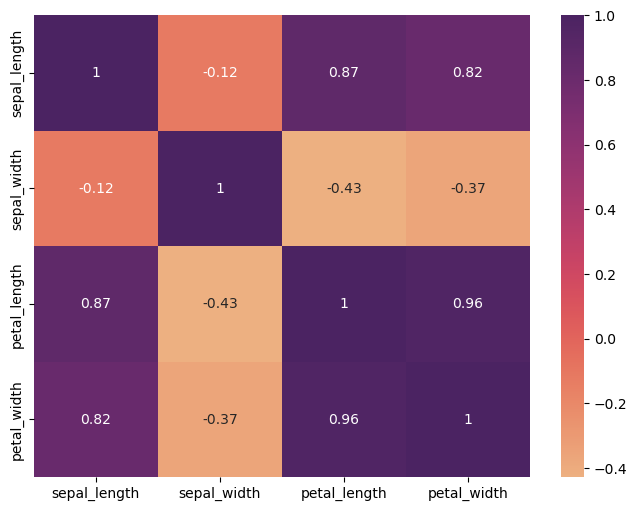

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = sns.load_dataset("iris")

corr_matrix = iris.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='flare')
plt.show()

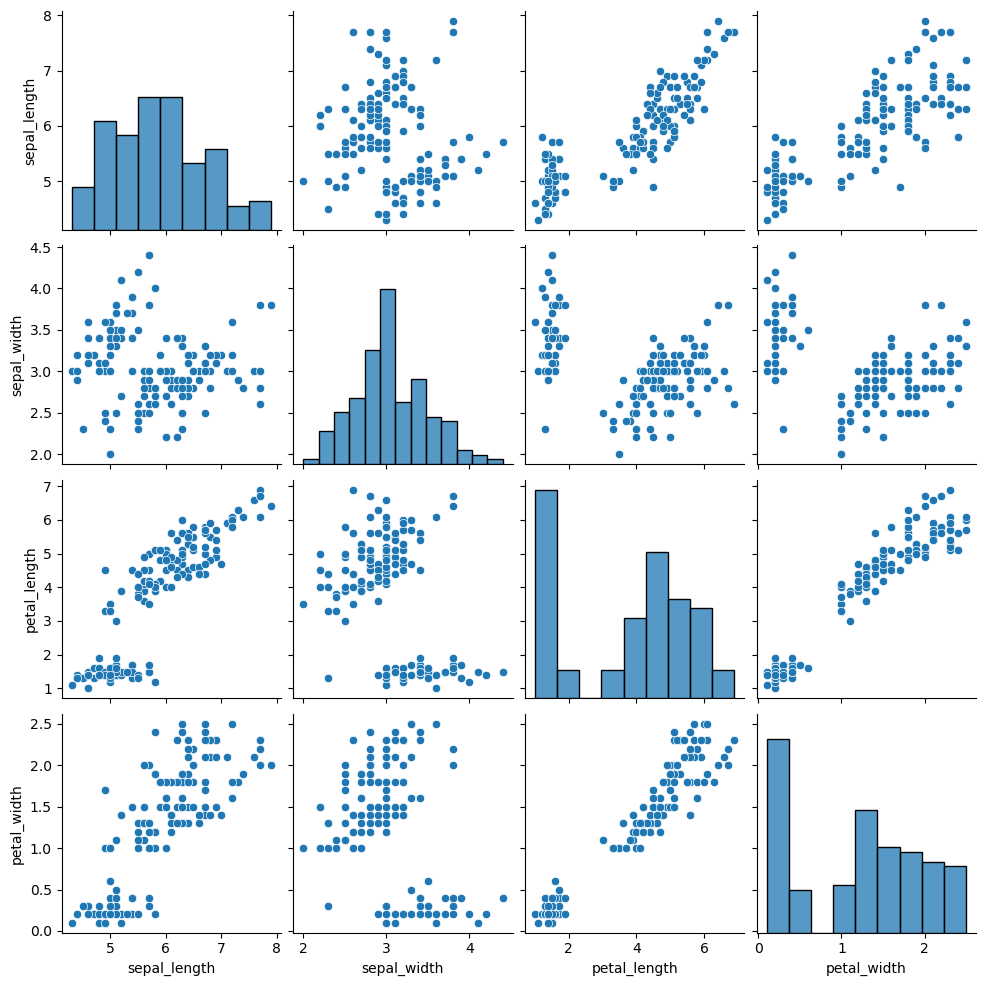

In [72]:
sns.pairplot(df)
plt.show()